In [165]:
# use GLCM from skimage.feature
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data
from skimage import io
import os
# PCA from sklearn
from sklearn.decomposition import PCA
# train test split from sklearn
from sklearn.model_selection import train_test_split
# lazy predict
from lazypredict.Supervised import LazyClassifier
# brightness correction
from skimage import exposure
# HOG
from skimage.feature import hog, local_binary_pattern


In [ ]:
# load the image for processing
image = io.imread('flooded/1.jpg', as_gray=True)

# make the image uint8, where the pixel values range from 0 to 255
image = np.array(image, dtype=np.uint8)

# select some properties of the GLCM
# the distances are 1, 2, 3, 4 pixels
# the angles are 0, pi/4
# the properties are 'energy', 'homogeneity', 'contrast', 'dissimilarity', 'correlation', 'ASM'

distances = [1, 5,10,20]

# calculate the GLCM
glcm = greycomatrix(image, distances, [0], normed=True, symmetric=True)

# calculate the properties
contrast = greycoprops(glcm, 'contrast')
dissimilarity = greycoprops(glcm, 'dissimilarity')
homogeneity = greycoprops(glcm, 'homogeneity')
energy = greycoprops(glcm, 'energy')
correlation = greycoprops(glcm, 'correlation')
ASM = greycoprops(glcm, 'ASM')

# scatter plot of the properties with labels
# x-axis is the distance used to calculate the GLCM
# y-axis is the property value
# scatter color is the the measured property

plt.figure(figsize=(12, 8))
plt.scatter(distances, contrast, c='r', s=10, label='contrast')
plt.scatter(distances, dissimilarity, c='g', s=10, label='dissimilarity')
plt.scatter(distances, homogeneity, c='b', s=10, label='homogeneity')
plt.scatter(distances, energy, c='y', s=10, label='energy')
plt.scatter(distances, correlation, c='c', s=10, label='correlation')
plt.scatter(distances, ASM, c='m', s=10, label='ASM')

plt.xticks([1, 2, 3, 4,5,6], ['1', '2', '3', '4', '5', '6'])
plt.ylim([0, 1.5])
plt.legend(loc='upper right')
plt.xlabel('distance in pixels')
plt.ylabel('value of the property')
plt.show()

# print the properties for each
print('contrast: ', contrast)
print('dissimilarity: ', dissimilarity)
print('homogeneity: ', homogeneity)
print('energy: ', energy)
print('correlation: ', correlation)
print('ASM: ', ASM)





In [21]:
image = io.imread('flooded/1.jpg', as_gray=True)

# make the image uint8, where the pixel values range from 0 to 255
image = np.array(image, dtype=np.uint8)

In [100]:
def get_patches(image, n = 10):
    # width and height of the image
    w, h = image.shape
    # patch size = w/n, h/n
    patches = []
    for i in range(n):
        for j in range(n):
            patch = image[int(i*w/n):int((i+1)*w/n), int(j*h/n):int((j+1)*h/n)]
            patches.append(patch)
    return patches

In [103]:
def glcm_properties(image, distances, angles, n = 10):
    w, h = image.shape

    patches = get_patches(image, n)
    # calculate the GLCM for each patch
    glcm = [greycomatrix(patch, distances, angles, normed=True, symmetric=True) for patch in patches]

    # calculate the properties for each patch
    contrast = np.array([greycoprops(g, 'contrast') for g in glcm]).squeeze().T
    dissimilarity = np.array([greycoprops(g, 'dissimilarity') for g in glcm]).squeeze().T
    homogeneity = np.array([greycoprops(g, 'homogeneity') for g in glcm]).squeeze().T
    energy = np.array([greycoprops(g, 'energy') for g in glcm]).squeeze().T
    correlation = np.array([greycoprops(g, 'correlation') for g in glcm]).squeeze().T
    ASM = np.array([greycoprops(g, 'ASM') for g in glcm]).squeeze().T

    return contrast, dissimilarity, homogeneity, energy, correlation, ASM


In [58]:
#shape of glcm is (100, 4, 2, 2, 2, 2)
print(np.array(glcm).shape)

#shape of properties is 
print(np.array(contrast).shape)
print(np.array(dissimilarity).shape)



(100, 256, 256, 1, 4)
(4, 100)
(4, 100)


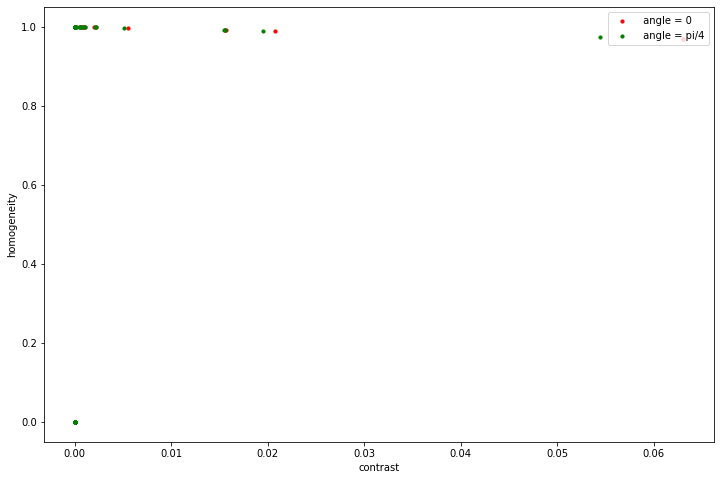

In [56]:
# plot the contrast values for all patches
# plot each 2-property combination for each distance and angle in one plot

# plot the contrast & homogeneity values, angle = 0
plt.figure(figsize=(12, 8))
plt.scatter(contrast[0], homogeneity[0], c='r', s=10, label=' angle = 0')
plt.scatter(contrast[1], homogeneity[1], c='g', s=10, label=' angle = pi/4')

plt.legend(loc='upper right')
plt.xlabel('contrast')
plt.ylabel('homogeneity')
plt.show()


In [63]:
w, h = image.shape

distances = [min(w,h)//100]
angles = [np.pi/4, np.pi/2, 3*np.pi/4, np.pi]

features = np.concatenate(glcm_properties(image, distances, angles), axis=0)

In [67]:
print(features.shape)

features_flattened = features.flatten()

print(features_flattened.shape)

(24, 100)
(2400,)


In [155]:
features_flattened_2 = []
label_2 = []

In [156]:
# loop over all images in flooded folder

for i in range(0, 461):
    img2vec = Img2Vec()
    img = Image.open('flooded/' + str(i) + '.jpg')
    vec = img2vec.get_vec(img, tensor=True)

    # convert tensor to numpy array
    features = vec.numpy()

    features_flattened_2.append(features.flatten())
    label_2.append(1)


In [157]:
# loop over all images in flooded folder

for i in range(578, 1039):
    img2vec = Img2Vec()
    img = Image.open('non-flooded/' + str(i) + '.jpg')
    vec = img2vec.get_vec(img, tensor=True)

    # convert tensor to numpy array
    features = vec.numpy()

    features_flattened_2.append(features.flatten())
    label_2.append(0)


In [143]:
# loop over all images in flooded folder
# calculate the features for each image

for i in range(0, 461):
    image = io.imread('flooded/'+str(i)+'.jpg', as_gray=True)
    # make the image uint8, where the pixel values range from 0 to 255
    image = np.array(image, dtype=np.uint8)
    # calculate the features
    w, h = image.shape

    distances = [min(w,h)//100]
    angles = [np.pi/4, np.pi/2, 3*np.pi/4, np.pi]

    features = np.concatenate(glcm_properties(image, distances, angles, 8), axis=0)
    features_flattened_2.append(features.flatten())
    label_2.append(1)


In [144]:
# loop over all images in flooded folder
# calculate the features for each image

for i in range(578, 1039):
    image = io.imread('non-flooded/'+str(i)+'.jpg', as_gray=True)
    # make the image uint8, where the pixel values range from 0 to 255
    image = np.array(image, dtype=np.uint8)
    # calculate the features
    w, h = image.shape

    distances = [min(w,h)//100]
    angles = [np.pi/4, np.pi/2, 3*np.pi/4, np.pi]

    features = np.concatenate(glcm_properties(image, distances, angles, 8), axis=0)
    features_flattened_2.append(features.flatten())
    label_2.append(0)


In [158]:
print(np.array(features_flattened_2).shape)

(922, 512)


In [159]:
# [array([]), array([]), array([]), array([]), array([]), array([])] -> numpy array
features_flattened_2_np = np.array(features_flattened_2)
print(features_flattened_2_np.shape)

(922, 512)


In [146]:
# make features_flattened_np 2D
features_np = np.reshape(features_flattened_2_np, (len(features_flattened_2), 24 * 8 * 8))
print(features_np.shape)

(922, 1536)


In [160]:
label_2_np = np.array(label_2)
print(label_2_np.shape)

(922,)


In [161]:
# shuffle the features and labels
indices = np.arange(len(label_2))
np.random.shuffle(indices)
features_np_shuffled = features_np[indices]
label_np_shuffled = label_2_np[indices]

In [125]:
# run PCA on features_np_shuffled
pca = PCA()
pca.fit(features_np_shuffled)
features_np_shuffled_pca = pca.transform(features_np_shuffled)

print(features_np_shuffled_pca.shape)

(99, 99)


In [162]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_np_shuffled, label_np_shuffled, test_size=0.2, random_state=42)

In [167]:
# lazy predict classifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)



100%|██████████| 29/29 [00:20<00:00,  1.40it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                0.58               0.59     0.59      0.57   
DecisionTreeClassifier             0.57               0.58     0.58      0.53   
ExtraTreesClassifier               0.57               0.58     0.58      0.54   
NuSVC                              0.55               0.56     0.56      0.53   
QuadraticDiscriminantAnalysis      0.55               0.56     0.56      0.50   
RandomForestClassifier             0.54               0.54     0.54      0.51   
BernoulliNB                        0.55               0.54     0.54      0.53   
BaggingClassifier                  0.54               0.54     0.54      0.51   
XGBClassifier                      0.53               0.54     0.54      0.50   
Perceptron                         0.55               0.54     0.54      0.52   

                           

In [168]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreeClassifier,0.58,0.59,0.59,0.57,0.08
DecisionTreeClassifier,0.57,0.58,0.58,0.53,0.28
ExtraTreesClassifier,0.57,0.58,0.58,0.54,1.13
NuSVC,0.55,0.56,0.56,0.53,0.48
QuadraticDiscriminantAnalysis,0.55,0.56,0.56,0.50,0.61
RandomForestClassifier,0.54,0.54,0.54,0.51,0.78
BernoulliNB,0.55,0.54,0.54,0.53,0.09
BaggingClassifier,0.54,0.54,0.54,0.51,1.48
XGBClassifier,0.53,0.54,0.54,0.50,0.94


In [151]:
from img2vec_pytorch import Img2Vec
from PIL import Image

In [154]:
img2vec = Img2Vec()
img = Image.open('test.jpg')
vec = img2vec.get_vec(img, tensor=True)

print(vec.shape)

torch.Size([1, 512, 1, 1])


In [ ]:
# segment the image into flood and non-flood areas
# flood areas are white, non-flood areas are black